<h1>Regression Tree Model to Predict Pension Funded Status</h1>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import pprint

<h1>Get 2014 data to train model</h1>

In [2]:
from get_clean_data_DTR import get_data, clean_data, get_feats, get_target

In [3]:
df = get_data(2014)

In [4]:
df_clean = clean_data(df,2014)

<h3>Features:</h3>
    <ul><li>Prior year funding target
        <li>Prior year target normal cost (expected growth in funding target)
        <li>Prior year benefits paid
        <li>Prior year effective interest rate (single effective rate that approximates the effect of 3-tiered rates actually used to value funding target
    </ul>

In [5]:
X = get_feats(df_clean, 2014)
y = get_target(df_clean, 2014)

<h1>Regression Tree - Trained on 2014 Data</h1>

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [7]:
dtr_depth2_14 = DecisionTreeRegressor(max_depth=2)
dtr_depth3_14 = DecisionTreeRegressor(max_depth=3)
dtr_depth4_14 = DecisionTreeRegressor(max_depth=4)

In [8]:
dtr_depth2_14.fit(X,y)
dtr_depth3_14.fit(X,y)
dtr_depth4_14.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [9]:
def plot_results(y_true, y_pred):
    plt.figure(figsize=(20,8))
    xx = np.linspace(0, len(y_true), num=len(y_true))
    plt.scatter(xx, y_true, s=20, edgecolor="black", c="darkorange", label="data")
    plt.plot(xx, y_pred, color="cornflowerblue", label="max_depth=4", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("Funding Target")
    plt.title("Predicting Funding Target from Decision Tree Regressor trained on 2014 data")
    plt.legend()
    plt.show()
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
    return

def plot_resid(y_true, y_pred):
    resid = y_true - y_pred

    plt.figure(figsize=(20,8))
    xx = np.linspace(0, len(y_true), num=len(y_true))
    plt.scatter(xx, resid, s=20, edgecolor="black", c="blue", label="residuals")
    plt.xlabel("data")
    plt.ylabel("residual")
    plt.title("Residuals of Predictions vs Actuals (Decision Tree Regressor Max Depth 4)")
    #plt.ylim(ymin=-.25,ymax=.25)
    plt.legend()
    plt.show()
    return

<h1>Test Regression Tree on 2015 data</h1>

In [10]:
df15 = get_data(2015)

In [11]:
df15_clean = clean_data(df15,2015)

In [12]:
X15 = get_feats(df15_clean,2015)
y15 = get_target(df15_clean,2015)

In [13]:
print('Regression Trees: \nMax Depth 2: {}\nMax Depth 3: {}\nMax Depth 4: {}'.format(dtr_depth2_14.score(X15,y15), dtr_depth3_14.score(X15,y15), dtr_depth4_14.score(X15,y15)))

Regression Trees: 
Max Depth 2: 0.857474146923643
Max Depth 3: 0.9108632865925612
Max Depth 4: 0.9441965360318462


In [14]:
y2_15 = dtr_depth2_14.predict(X15)
y3_15 = dtr_depth3_14.predict(X15)
y4_15 = dtr_depth4_14.predict(X15)

<h3>Plot results of model (max depth = 4) predictions (blue spikes) vs. actual values (red dots)</h3>

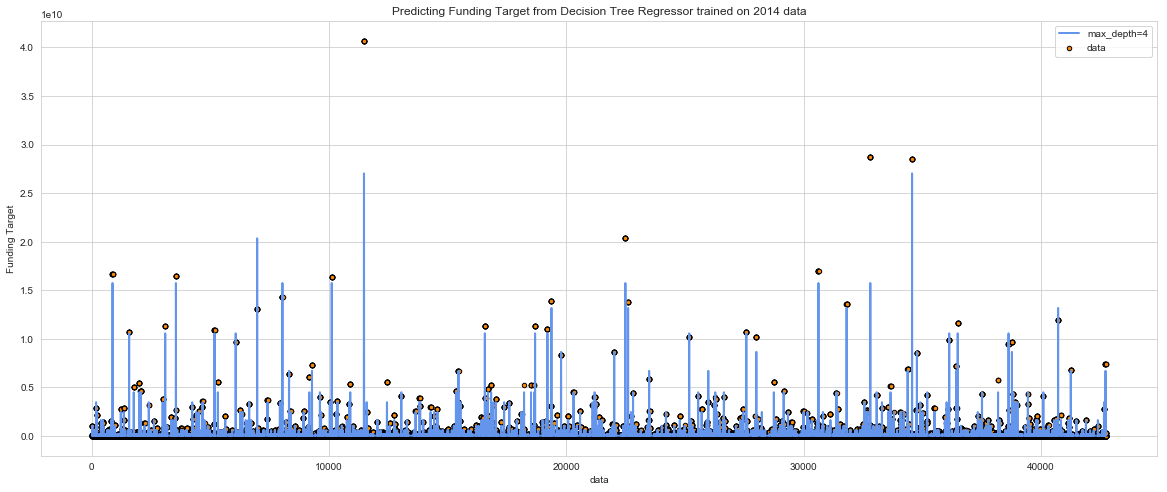

In [17]:
plot_results(y15,y4_15)

<h3>Plot residuals</h3>

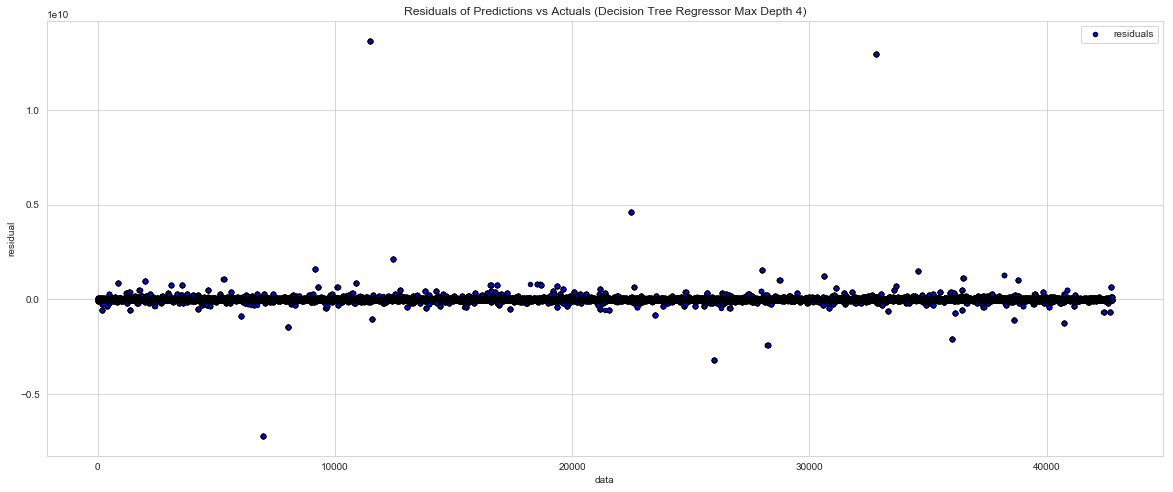

In [18]:
plot_resid(y15, y4_15)

<h3>Export Tree Graphic</h3>

In [ ]:
tree.export_graphviz(dtr_depth4_14 ,out_file='dtr_depth4_14_15pred.dot') 

In [19]:
X15

,eir,part_cnt_2015,fndng_tgt_2015,tgt_nrml_cost_2015,pmts_to_part_2015
0,6.43,838,38405053,288618.0,4156486.0
1,6.25,1681,107445427,800000.0,4845441.0
2,6.25,1681,107445427,800000.0,4845441.0
3,6.25,1681,107445427,800000.0,4845441.0
4,6.25,1681,107445427,800000.0,4845441.0
5,6.25,1681,107445427,800000.0,4845441.0
6,6.25,1681,107445427,800000.0,4845441.0
7,6.25,1681,107445427,800000.0,4845441.0
8,6.25,1681,107445427,800000.0,4845441.0
9,6.25,1681,107445427,800000.0,4845441.0


In [20]:
dtr_depth4_14.feature_importances_

array([0.       , 0.022792 , 0.9746962, 0.       , 0.0025118])

<h1>Test on 2016 data</h1>

In [21]:
df16 = get_data(2016)

In [22]:
df16_clean = clean_data(df16,2016)

In [23]:
X16 = get_feats(df16_clean,2016)
y16 = get_target(df16_clean,2016)

In [24]:
print('Regression Trees: \nMax Depth 2: {}\nMax Depth 3: {}\nMax Depth 4: {}'.format(dtr_depth2_14.score(X16,y16), dtr_depth3_14.score(X16,y16), dtr_depth4_14.score(X16,y16)))

Regression Trees: 
Max Depth 2: 0.8119286812115092
Max Depth 3: 0.7438671824532612
Max Depth 4: 0.9147229977408011


In [25]:
y2_16 = dtr_depth2_14.predict(X16)
y3_16 = dtr_depth3_14.predict(X16)
y4_16 = dtr_depth4_14.predict(X16)

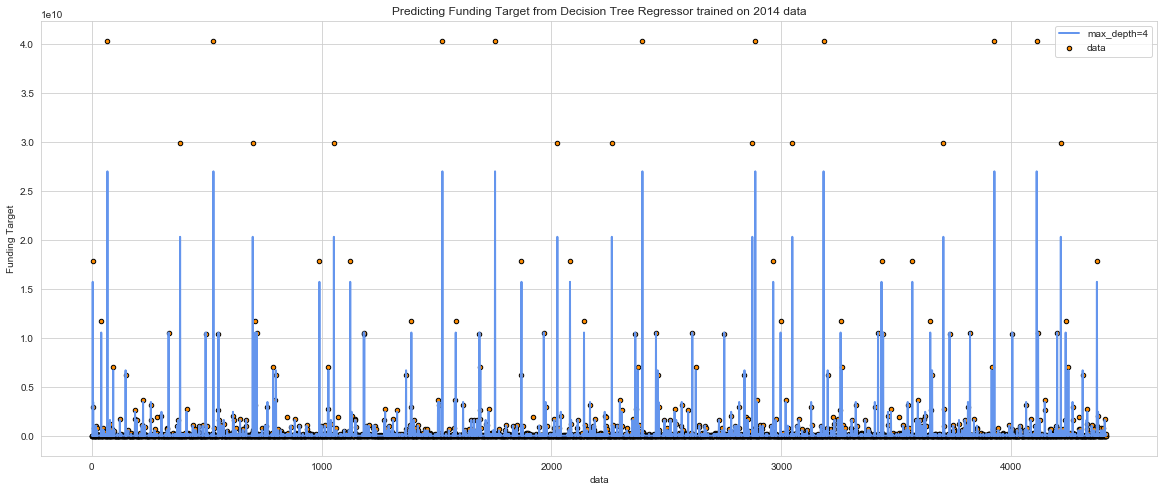

In [26]:
plot_results(y16, y4_16)

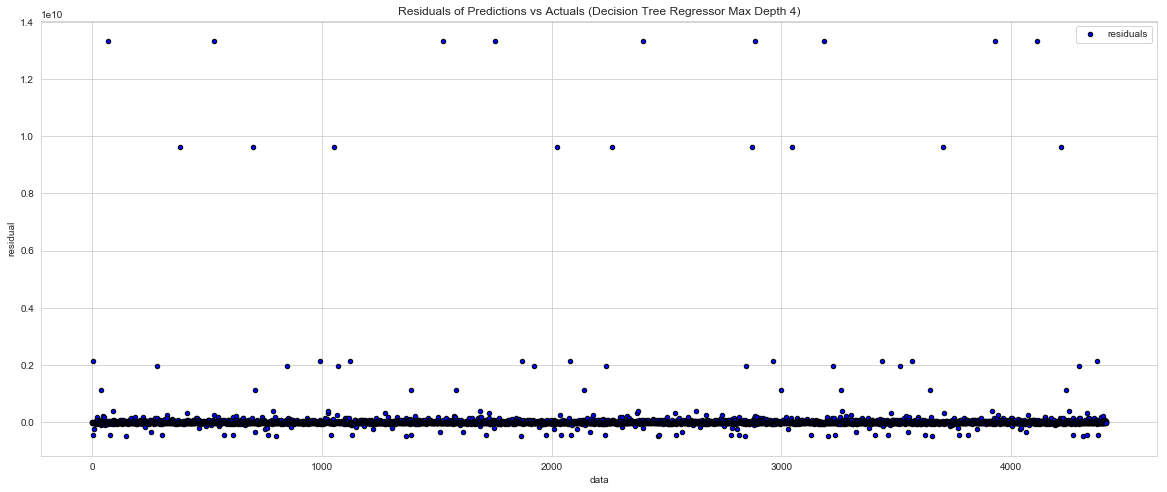

In [27]:
plot_resid(y16, y4_16)

In [28]:
y4_16[100] - y16[100], y4_16[100]

(22555978.836169384, 32438204.836169384)

<h1>Look at what plans have largest deviation</h1>

In [ ]:
compare = pd.concat([X16.loc[resid_16.index[resid_16<-.2]], y4_16[resid_16.index[resid_16<-.2]], y16[resid_16.index[resid_16<.2]]],axis=1)

In [ ]:
resid_16.index[resid_16<-.2]

In [ ]:
compare

In [ ]:
len(y16[resid_16.index[resid_16<.2]])

<h1>Adaboosted Regression Tree - Train on 2014 Data</h1>

In [29]:
from sklearn.ensemble import AdaBoostRegressor

In [30]:
adaregr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), learning_rate = .10, \
                            n_estimators=1000, random_state=12)

In [31]:
adaregr.fit(X,y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.1, loss='linear', n_estimators=1000,
         random_state=12)

<h1>Test Adaboosted Tree on 2015 Data</h1>

In [32]:
y_ada_15 = adaregr.predict(X15)

In [33]:
adaregr.score(X15, y15)

0.9549591612734977

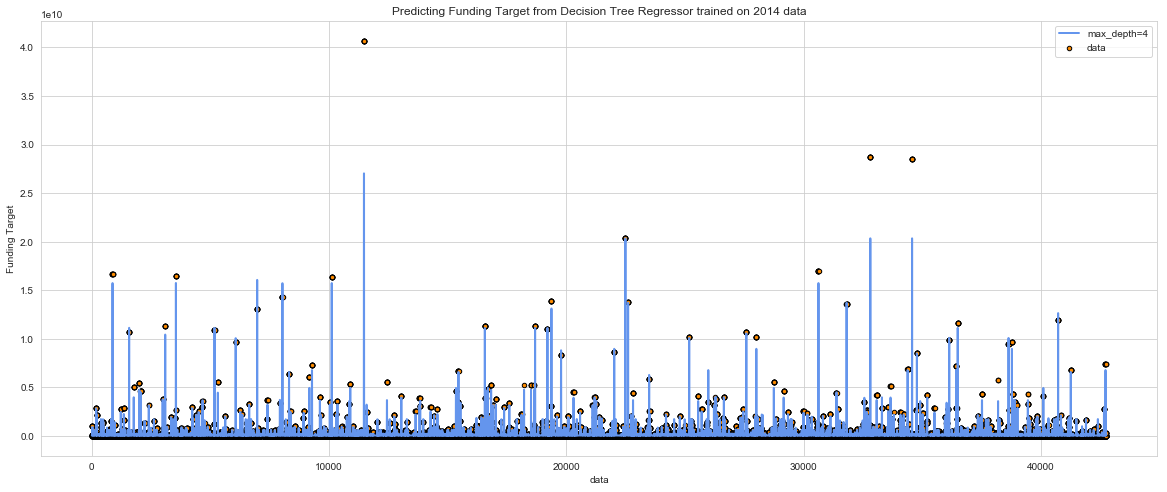

In [34]:
plot_results(y15, y_ada_15)

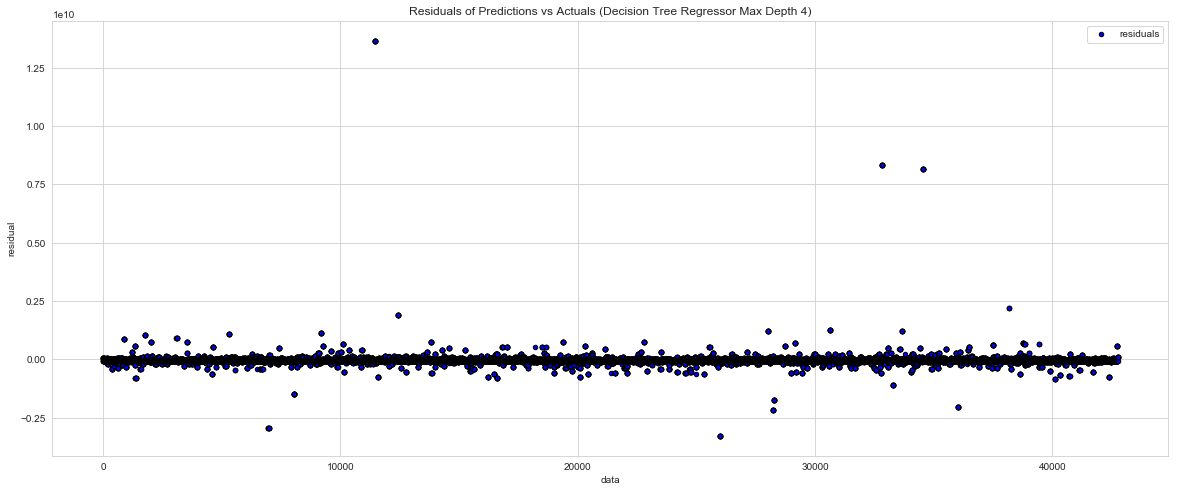

In [35]:
plot_resid(y15, y_ada_15)

<h1>Test Adaboosted Tree on 2016 Data</h1>

In [36]:
y_ada_16 = adaregr.predict(X16)

In [37]:
adaregr.score(X16, y16)

0.914674301659077

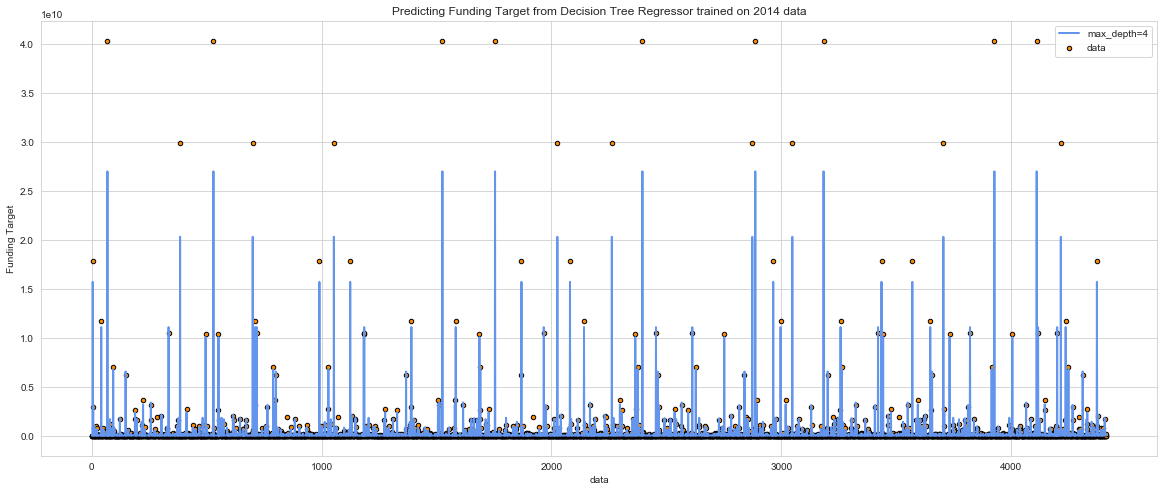

In [38]:
plot_results(y16, y_ada_16)

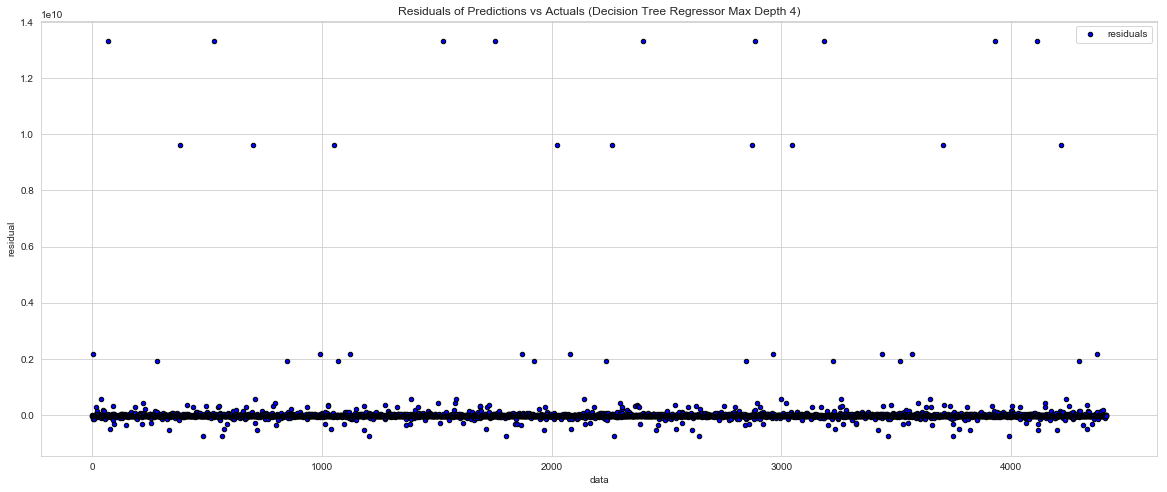

In [39]:
plot_resid(y16, y_ada_16)

In [53]:
resid_16 = y16-y_ada_16

In [57]:
y_ada_16

,Pred_FT_2017
0,5.563328e+07
1,6.027206e+07
2,5.563328e+07
3,5.563328e+07
4,1.574399e+10
5,5.563328e+07
6,3.163574e+09
7,5.563328e+07
8,5.563328e+07
9,5.563328e+07


In [54]:
resid_16.quantile([.25, .5, .75])

,Pred_FT_2017,0,1,2,3,4,5,6,7,8,...,4571,4572,4573,4574,4575,4576,4577,4578,4579,4580
0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X16.info()

In [45]:
X16_full = pd.concat([X16, y16, pd.DataFrame(y_ada_16).rename(columns = {0: 'Pred_FT_2017'})],\
                     axis=1, join='inner')

In [48]:
X16_full = pd.concat([X16, y16], axis=1)
y_ada_16 = pd.DataFrame(y_ada_16).rename(columns = {0: 'Pred_FT_2017'})
#pd.DataFrame(y_ada_16).rename(columns = {0: 'Pred_FT_2017'})

In [49]:
X16_full = pd.concat([X16_full, y_ada_16], axis=1, join='inner')

In [50]:
X16.shape, y_ada_16.shape, y16.shape, X16_full.shape

((4414, 5), (4414, 1), (4414,), (4260, 7))

In [51]:
X16_full

,eir,part_cnt_2016,fndng_tgt_2016,tgt_nrml_cost_2016,pmts_to_part_2016,fndng_tgt_2017,Pred_FT_2017
0,6.05,108,9374738,112149.0,7.092840e+05,9646868,5.563328e+07
1,6.19,703,38897832,4536774.0,1.534273e+06,45600999,6.027206e+07
2,6.08,2038,24473823,958420.0,1.580943e+06,24687840,5.563328e+07
3,6.06,129,8348430,251030.0,4.749240e+05,8577654,5.563328e+07
4,6.11,149101,16988572321,587417946.0,9.723685e+08,17897466850,1.574399e+10
5,5.91,125,2840544,186432.0,5.293230e+05,2876854,5.563328e+07
6,6.04,31769,2985373865,23768550.0,2.122051e+08,3008562834,3.163574e+09
7,6.47,166,4849805,429413.0,1.039180e+05,5786686,5.563328e+07
8,6.19,1541,49701380,650000.0,4.837016e+06,49396648,5.563328e+07
9,6.00,138,10926146,20000.0,8.454960e+05,10941621,5.563328e+07


In [52]:
X16_full.describe()

,eir,part_cnt_2016,fndng_tgt_2016,tgt_nrml_cost_2016,pmts_to_part_2016,fndng_tgt_2017,Pred_FT_2017
count,4260.000000,4260.000000,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03,4.260000e+03
mean,6.065507,4427.825822,4.034180e+08,6.420644e+06,3.245591e+07,4.157113e+08,3.901013e+08
std,0.230458,21176.791042,2.586327e+09,4.001811e+07,2.025819e+08,2.628248e+09,1.961553e+09
min,3.880000,101.000000,5.104090e+05,0.000000e+00,6.400000e+02,1.132839e+06,5.563328e+07
25%,6.000000,192.000000,9.219368e+06,9.000000e+04,5.730680e+05,9.852024e+06,5.563328e+07
50%,6.080000,387.000000,2.121494e+07,4.709990e+05,1.562022e+06,2.177750e+07,5.563328e+07
75%,6.160000,1355.000000,7.854026e+07,1.500000e+06,5.795556e+06,7.939472e+07,6.900007e+07
max,8.250000,287809.000000,4.069247e+10,5.874179e+08,3.429693e+09,4.037659e+10,2.703231e+10


In [63]:
X16_full['Residual']=X16_full['fndng_tgt_2017'] - X16_full['Pred_FT_2017']
X16_full['Residual_Pct'] = X16_full['Residual']/X16_full['fndng_tgt_2017']

In [64]:
X16_full.sort_values('Residual_Pct')

,eir,part_cnt_2016,fndng_tgt_2016,tgt_nrml_cost_2016,pmts_to_part_2016,fndng_tgt_2017,Pred_FT_2017,Residual,Residual_Pct
2873,5.97,126,4323301,0.0,5.134020e+05,4247301,2.034560e+10,-2.034135e+10,-4789.242412
68,6.10,526,5769565,0.0,3.125040e+05,5958220,2.703231e+10,-2.702635e+10,-4535.977711
3183,6.10,128,5805868,30000.0,2.723960e+05,6060806,2.703231e+10,-2.702625e+10,-4459.184229
93,6.15,187,1564092,70000.0,8.233600e+04,1628855,6.783630e+09,-6.782001e+09,-4163.661558
3704,6.27,280,4627791,197060.0,1.483670e+05,5074963,2.034560e+10,-2.034053e+10,-4008.014723
2395,5.98,147,7441552,25000.0,5.052870e+05,7728648,2.703231e+10,-2.702458e+10,-3496.676610
2025,6.06,217,6567421,35000.0,4.045550e+05,6498280,2.034560e+10,-2.033910e+10,-3129.921011
990,6.10,101,4755762,282117.0,1.341150e+05,5379410,1.574399e+10,-1.573861e+10,-2925.712423
3129,6.10,353,1340656,145761.0,8.510440e+05,1201146,3.163574e+09,-3.162373e+09,-2632.796235
2839,6.18,134,2814060,0.0,5.676430e+05,2610274,6.591332e+09,-6.588721e+09,-2524.149338
